## CP 1 - Front End & Mobile Deploy
ALUNOS:<br>
Arthur Coutinho Santos - RM97804<br>
Luis Gustavo Dias da Silva - RM99589<br>
Nicolas Felippe Gonçalves - RM98244

# Case Ifood


# Installs

In [1]:
!pip install pycaret==3.2.0

In [2]:
pip install scikit-learn==1.2.2

In [3]:
pip install pycaret[full]

In [4]:
!pip install numba

# Imports

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime

from pycaret.datasets import get_data
from pycaret.classification import *
from sklearn import metrics

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 40)
pd.set_option('display.max_colwidth', 1000)

import warnings
warnings.filterwarnings('ignore')

# Descrição / Objetivo do problema

* O objetivo

O objetivo da equipe é construir um modelo preditivo que produzirá o maior lucro para a próxima campanha de marketing direto, programada para o próximo mês. A nova campanha, sexta, visa a venda de um novo gadget para clientes cadastrados no Banco de Dados da empresa. Para construir o modelo, foi realizada uma campanha piloto envolvendo 2.240 clientes. Os clientes foram selecionados aleatoriamente e contatados por telefone para a aquisição do gadget. Durante os meses seguintes, os clientes que compraram a oferta foram devidamente etiquetados. O custo total da campanha da amostra foi de 6,720MU e a receita gerada pelos clientes que aceitaram a oferta foi de 3,674MU. Globalmente, a campanha teve um lucro de -3,046MU. A taxa de sucesso da campanha foi de 15%. O objetivo da equipe é desenvolver um modelo que preveja o comportamento do cliente e aplicá-lo ao restante da base de clientes. Felizmente, o modelo permitirá que a empresa escolha a dedo os clientes com maior probabilidade de comprar a oferta, deixando de fora os não respondentes, tornando a próxima campanha altamente lucrativa. Além disso, além de maximizar o lucro da campanha, o CMO está interessado em estudar as características dos clientes que desejam comprar o gadget.
Os dados
O conjunto de dados contém características sociodemográficas e firográficas de cerca de 2.240 clientes contatados. Além disso, contém um sinalizador para aqueles clientes que responderam à campanha, comprando o produto.


# Data Loading

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
#Google COlab
df = pd.read_csv('/content/drive/MyDrive/FIAP/2TIAR/FRONT END e MOBILE DEVELOPMENT/Case_Ifood/data.csv',encoding='utf-8')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


# Data Cleaning

Drop da feature ID por ser um identificador

In [8]:
df.drop('ID',axis = 1, inplace = True, errors = 'ignore')
df.shape

(2240, 28)

## Features com valores unicos
Verificando a existência de features com valores únicos (devem ser dropadas por não contribuirem para a explicar a variação da feature target)

In [9]:
df.nunique().sort_values()

Z_Revenue                 1
Z_CostContact             1
Response                  2
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp2              2
AcceptedCmp1              2
Complain                  2
Teenhome                  3
Kidhome                   3
Education                 5
Marital_Status            8
NumCatalogPurchases      14
NumStorePurchases        14
NumDealsPurchases        15
NumWebPurchases          15
NumWebVisitsMonth        16
Year_Birth               59
Recency                 100
MntFruits               158
MntSweetProducts        177
MntFishProducts         182
MntGoldProds            213
MntMeatProducts         558
Dt_Customer             663
MntWines                776
Income                 1974
dtype: int64

In [10]:
df.drop(['Z_CostContact','Z_Revenue'],axis=1,inplace = True, errors = 'ignore')

## NaN analysis

In [11]:
df.isna().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

Somente a feature Income possui valores nulos.
Analisando as linhas com valores nulos em relação aos valores da feature target

In [12]:
#Distribuição da feature Response entre as amostras com Income = NaN
df[df.Income.isna()].Response.value_counts()

0    23
1     1
Name: Response, dtype: int64

In [13]:
# Proporção de 0 e 1 da feature Response no df completo
df.Response.value_counts(normalize = True)

0    0.850893
1    0.149107
Name: Response, dtype: float64

In [14]:
print('% amostras com NaN: ',np.round((df.Income.isna().sum()/len(df))*100,2))
print('% amostras com NaN e Response = 1: ',
      np.round((( len(df[(df.Income.isna()) & (df.Response == 1)]) / len(df))*100),2))

% amostras com NaN:  1.07
% amostras com NaN e Response = 1:  0.04


Dado que as 24 linhas com valores Nan representam 1% do dataset total, e que entre as 24 linhas com Income == Nan somente uma apresentou Response == 1 (0.04%), as 24 linhas serão dropadas

In [15]:
print('Shape antes do dropna: ',df.shape[0])
df.dropna(axis=0,inplace = True)
print('Shape após o dropna: ',df.shape[0])

Shape antes do dropna:  2240
Shape após o dropna:  2216


## Ajuste do dtypes

In [16]:
#df = df.convert_dtypes()
df.Dt_Customer = pd.to_datetime(df.Dt_Customer)
df.Response = df.Response.astype('bool')
df.dtypes

Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Response                         bool
dtype: objec

# Feature Engineering

## Idade dos clientes

In [16]:
from datetime import datetime
# Definir o ano de referência como 2020 ao invés do ano atual
ano_referencia = 2020

# Calcula a idade baseada no ano de 2020
df['Age'] = ano_referencia - df['Year_Birth']

# Remove a coluna Year_Birth
df.drop('Year_Birth', axis=1, errors='ignore', inplace=True)

# Exibe as primeiras linhas do dataframe
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,63
1,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,66
2,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,55
3,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,36
4,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,39


## Tempo como cliente

In [17]:
# Define a data de referência como 2020
dt_2020 = pd.to_datetime('2020-01-01').date()

# Calcula o tempo desde a data de cliente até 2020
df['Time_Customer'] = dt_2020 - pd.to_datetime(df['Dt_Customer']).dt.date
df['Time_Customer'] = df['Time_Customer'] / np.timedelta64(1, 'Y')

# Exibe os resultados
print(df[['Dt_Customer', 'Time_Customer']])


     Dt_Customer  Time_Customer
0     2012-09-04       7.323901
1     2014-03-08       5.818052
2     2013-08-21       6.362896
3     2014-02-10       5.889238
4     2014-01-19       5.949472
...          ...            ...
2235  2013-06-13       6.551811
2236  2014-06-10       5.560689
2237  2014-01-25       5.933044
2238  2014-01-24       5.935782
2239  2012-10-15       7.211647

[2216 rows x 2 columns]


## Total de Gastos

In [ ]:

columns_to_sum = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['Total_Spent'] = df[columns_to_sum].sum(axis=1)


## Engajamento Total

In [ ]:

columns_to_sum_engagement = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
df['Total_Engagement'] = df[columns_to_sum_engagement].sum(axis=1)


## Renda per Capita no Domicílio

In [ ]:

df['Household_Size'] = df['Kidhome'] + df['Teenhome'] + 1  # Assumindo que há pelo menos um adulto por família
df['Income_per_Household_Member'] = df['Income'] / df['Household_Size']


### Removendo valores incoerentes com a variável Marital_Status

In [ ]:
index_to_drop = df[(df['Marital_Status'] =='YOLO') | (df['Marital_Status'] =='Absurd') | (df['Marital_Status'] =='absurd') | (df['Marital_Status'] == 'Alone')].index
df.drop(index_to_drop,inplace = True)
df = df.reset_index(drop = True)
df.Marital_Status.value_counts()
print(df.shape)

(2209, 30)


In [ ]:
df.rename(columns={'Response':'z_Response'},inplace = True)
cols = df.columns.sort_values()
df = df[cols]
df.rename(columns={'z_Response':'Response'},inplace = True)

df.columns

Index(['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'Age', 'Complain', 'Dt_Customer', 'Education',
       'Household_Size', 'Income', 'Income_per_Household_Member', 'Kidhome',
       'Marital_Status', 'MntFishProducts', 'MntFruits', 'MntGoldProds',
       'MntMeatProducts', 'MntSweetProducts', 'MntWines',
       'NumCatalogPurchases', 'NumDealsPurchases', 'NumStorePurchases',
       'NumWebPurchases', 'NumWebVisitsMonth', 'Recency', 'Teenhome',
       'Total_Engagement', 'Total_Spent', 'Response'],
      dtype='object')

In [ ]:
#df.drop(['Dt_Customer'],axis=1,inplace = True, errors = 'ignore')


# Preparação do dataset para Modelagem


## Train Test Validation Split

In [ ]:
# sample 5% of data to be used as unseen data
df_train_test = df.sample(frac=0.95, random_state=123)
df_valid = df.drop(df_train_test.index)
df_train_test.reset_index(inplace=True, drop=True)
df_valid.reset_index(inplace=True, drop=True)
# print the revised shape
print('Data for Modeling: ' + str(df_train_test.shape))
print('Unseen Data For Predictions: ' + str(df_valid.shape))

Data for Modeling: (2099, 30)
Unseen Data For Predictions: (110, 30)


# Auto ML - PYCARET

**Para o problema de negócio em questão, a métrica Precision é a mais relevante.**

## Setup

In [ ]:
s = setup(data = df_train_test,
          target = 'Response',
          ignore_features=['Dt_Customer'],
          fix_imbalance = True,
          remove_outliers = True,
          pca=False,
          categorical_features = ['Education', 'Marital_Status'],
          numeric_features=['Age', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',  'Kidhome','Teenhome','NumCatalogPurchases','NumDealsPurchases','NumStorePurchases','NumWebPurchases','NumWebVisitsMonth','Time_Customer','Total_Engagement','Total_Spent'],
          session_id = 123)

,Description,Value
0,Session id,123
1,Target,Response
2,Target type,Binary
3,Original data shape,"(2099, 30)"
4,Transformed data shape,"(3072, 38)"
5,Transformed train set shape,"(2442, 38)"
6,Transformed test set shape,"(630, 38)"
7,Ignore features,1
8,Numeric features,16
9,Categorical features,2


In [ ]:
# check available models
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsClassifier,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDClassifier,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessClassifier,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron.MLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [ ]:
models(type='ensemble').index.tolist()

['rf', 'ada', 'gbc', 'et', 'xgboost', 'lightgbm', 'catboost']

## Comparativo entre Modelos

In [ ]:
best_model = compare_models(sort = 'auc', errors = 'raise')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.8843,0.8972,0.3211,0.7848,0.4519,0.4004,0.4522,0.5450
catboost,CatBoost Classifier,0.8775,0.8633,0.3208,0.7044,0.4353,0.3785,0.4175,13.3360
xgboost,Extreme Gradient Boosting,0.8673,0.8601,0.3346,0.6142,0.4258,0.3593,0.3838,1.0510
gbc,Gradient Boosting Classifier,0.8693,0.8510,0.3255,0.6313,0.4251,0.3606,0.3876,2.7930
lightgbm,Light Gradient Boosting Machine,0.8686,0.8449,0.3164,0.6275,0.4169,0.3526,0.3805,2.6510
rf,Random Forest Classifier,0.8700,0.8387,0.2397,0.7014,0.3524,0.3002,0.3555,1.4250
qda,Quadratic Discriminant Analysis,0.8557,0.8288,0.0682,0.3833,0.1124,0.0934,0.1325,0.5740
et,Extra Trees Classifier,0.8686,0.8272,0.2217,0.7036,0.3316,0.2815,0.3415,0.7780
lr,Logistic Regression,0.7597,0.8139,0.6875,0.3518,0.4642,0.3308,0.3619,1.5040
ada,Ada Boost Classifier,0.8543,0.7898,0.4026,0.5359,0.4552,0.3735,0.3811,0.9270


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

## RESUMO DE MODELOS:

De acordo com os modelos que foram desenvolvidos pelo PyCaret, tendo o objetivo de maximizar o lucro da campanha de marketing, considerando a AUC como métrica de análise, temos o seguinte:

<br>

- Linear Discriminant Analysis (LDA): O modelo que obteve o melhor valor de AUC obteve uma acurácia de 0.8843 e a AUC de 0.8972, indicando uma forte capacidade de distinguir entre clientes que irão engajar na campanha ou não. Um outro item que traz um valor positivo para esse modelo é a taxa de precisão que ficou com 0.7848, um bom indice para uma campanha que pretende ser acertiva na escolha dos clientes.

- CatBoost Classifier: O modelo que ficou com a segunda melhor avaliação de AUC obteve uma acurácia de 0.8775, AUC de 0.8633 e uma precisão de 0.7044, um valor bom, porém inferior ao primeiro. As métricas de interesse apresentam um bom desempenho para o desenvolvimento do mesmo.

- Extreme Gradient Boosting (XGBoost): O modelo que ficou com o terceiro melhor resultado em AUC ficou com uma acurácia de 0.8673 e AUC de 0.8601, já a precisão nesse modelo diminiui bastante seu desempenho em relação aos anteriores, ficando com 0.6142, o que pode impactar um pouco na seleção dos clientes que se engajarão na campanha.

- Gradient Boosting Classifier (GBC): Esse modelo ficou com valores próximos do XGBoost sendo acurácia de 0.8693 e AUC de 0.8510. Um item relevante de modelo é que com o algoritmo de boosting, se constrói modelos de forma sequencial, corrigindo erros dos modelos anteriores.

- Light Gradient Boosting Machine (LightGBM): Possui acurácia de 0.8686 e AUC de 0.8449. É semelhante ao XGBoost, mas geralmente mais rápido e eficiente, especialmente em grandes conjuntos de dados.

- Random Forest Classifier: O ultimo modelo que vale ser citado no momento ficou cco uma acurácia de 0.8700, AUC de 0.8387 e precisão de 0.7014, ampliando essa ultima métrica em relação aos 3 modelos anteriores. Esse modelo utiliza múltiplas árvores de decisão para melhorar a robustez e precisão da classificação.
<br>

Avaliando o objetivo principal do trabalho que é desenvolver um modelo para maximizar o lucro na campanha de marketing direto, os modelos que poderia atender melhor a esse objetivo seriam aqueles com a maior área sob a curva ROC (AUC), conforme solicitado, pois isso indica uma melhor capacidade de discriminar entre as classes positivas e negativas (clientes que comprarão versus os que não comprarão). Assim, LDA e CatBoost Classifier parecem ser as melhores opções para aprofundamento e otimização, dado que ambos mostraram um bom equilíbrio entre acurácia e AUC. Otimizar esses modelos através de tuning de hiperparâmetros e experimentação com diferentes features pode ajudar a alcançar um AUC ainda maior, contribuindo para o sucesso da campanha.

## Criando um Modelo

In [ ]:
# create model Linear Discriminant Analysis
mdl_lda = create_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8776,0.8909,0.3636,0.6667,0.4706,0.4081,0.4321
1,0.8980,0.9393,0.3636,0.8889,0.5161,0.4701,0.5292
2,0.8844,0.8891,0.2727,0.8571,0.4138,0.3681,0.4435
3,0.8844,0.8855,0.3636,0.7273,0.4848,0.4278,0.4605
4,0.8980,0.9556,0.3636,0.8889,0.5161,0.4701,0.5292
5,0.8912,0.8880,0.3636,0.8000,0.5000,0.4484,0.4925
6,0.8912,0.9171,0.4091,0.7500,0.5294,0.4738,0.5017
7,0.8776,0.8880,0.2727,0.7500,0.4000,0.3480,0.4037
8,0.8912,0.8973,0.3478,0.8889,0.5000,0.4517,0.5149


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
#create model CatBoost Classifier
mdl_catboost = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8639,0.8036,0.3636,0.5714,0.4444,0.3713,0.3836
1,0.8776,0.9153,0.2727,0.7500,0.4000,0.3480,0.4037
2,0.8571,0.7633,0.1818,0.5714,0.2759,0.2195,0.2644
3,0.8844,0.8436,0.3636,0.7273,0.4848,0.4278,0.4605
4,0.8776,0.9309,0.4091,0.6429,0.5000,0.4341,0.4485
5,0.8844,0.8655,0.3182,0.7778,0.4516,0.3994,0.4496
6,0.8844,0.8873,0.3636,0.7273,0.4848,0.4278,0.4605
7,0.8639,0.8615,0.1818,0.6667,0.2857,0.2368,0.2990
8,0.9048,0.8846,0.4348,0.9091,0.5882,0.5419,0.5892


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Para verificar se é possível obter algum modelo com melhor desempenho utilizou-se o "Ensembled models" combinando as previsões de vários modelos individuais para melhorar a robustez e a precisão das previsões finais. Essa técnica aproveita a diversidade entre diferentes modelos para criar um modelo composto que, geralmente, é mais confiável e possui uma melhor performance do que qualquer modelo único. De acordo com o que foi pesquisado, essa técnica ajuda a reduzir erros, minimizar o viés e a variância, e é particularmente eficaz em problemas complexos onde um único modelo pode não ser suficiente para capturar todas as nuances dos dados.

In [ ]:
ensembled_models = compare_models(include = models(type='ensemble').index.tolist(), fold = 3,sort = 'auc')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8679,0.8628,0.2941,0.6320,0.4012,0.3379,0.3694,2.2333
xgboost,Extreme Gradient Boosting,0.8652,0.8494,0.3032,0.6188,0.4053,0.3386,0.3672,0.7867
catboost,CatBoost Classifier,0.8713,0.8483,0.2716,0.6851,0.3887,0.3314,0.3762,12.3800
gbc,Gradient Boosting Classifier,0.8666,0.8466,0.2983,0.6400,0.3987,0.3352,0.3698,2.5433
et,Extra Trees Classifier,0.8666,0.8281,0.1627,0.7753,0.2672,0.2269,0.3133,0.7333
rf,Random Forest Classifier,0.8673,0.8274,0.2033,0.7265,0.3118,0.2636,0.3316,1.0967
ada,Ada Boost Classifier,0.8591,0.7775,0.3757,0.5466,0.4450,0.3675,0.3762,0.8700


Processing:   0%|          | 0/33 [00:00<?, ?it/s]

Após a analise dos resultados do Ensembled models, foi possível obsevar que os modelos anteriormente selecionados possuem melhores performances em relação aos demais, mantendo eles como escolhas para fazer o Tuning dos Parâmetros

## Tuning dos Hiperparâmetros

### LDA -	Linear Discriminant Analysis

In [ ]:
# Tuning do modelo lda sem ajustes de hiperparâmetros
tuned_lda = tune_model(mdl_lda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7687,0.8851,0.8182,0.3750,0.5143,0.3888,0.4398
1,0.8095,0.9418,0.8636,0.4318,0.5758,0.4700,0.5170
2,0.7959,0.8840,0.8182,0.4091,0.5455,0.4321,0.4753
3,0.7823,0.8905,0.8182,0.3913,0.5294,0.4099,0.4571
4,0.8367,0.9389,0.8636,0.4750,0.6129,0.5203,0.5576
5,0.7823,0.8844,0.7273,0.3810,0.5000,0.3778,0.4101
6,0.8571,0.9164,0.8182,0.5143,0.6316,0.5486,0.5714
7,0.7959,0.8909,0.8636,0.4130,0.5588,0.4468,0.4983
8,0.8095,0.9081,0.8261,0.4419,0.5758,0.4671,0.5051


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
#predict tuned_lda
predict_model(tuned_lda, raw_score = True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.8825,0.9033,0.2842,0.8182,0.4219,0.3731,0.4385


,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Age,Complain,Education,Household_Size,Income,Income_per_Household_Member,Kidhome,Marital_Status,MntFishProducts,MntFruits,MntGoldProds,MntMeatProducts,MntSweetProducts,MntWines,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Recency,Teenhome,Total_Engagement,Total_Spent,Time_Customer,Response,prediction_label,prediction_score_0,prediction_score_1
1869,0,0,0,0,0,65,0,PhD,1,67786.0,67786.000000,0,Widow,80,82,102,441,20,431,6,1,6,3,1,0,0,16,1156,10.313696,True,0,0.9368,0.0632
1782,0,0,0,0,0,60,0,PhD,3,31686.0,10562.000000,1,Married,0,0,1,5,0,11,0,2,3,1,6,31,1,6,17,9.820872,False,0,0.9993,0.0007
1944,0,0,0,0,0,74,0,PhD,2,59292.0,29646.000000,0,Together,19,14,14,68,14,378,5,2,8,3,3,71,1,18,507,10.798306,False,0,0.9996,0.0004
1670,0,0,1,0,0,54,0,PhD,3,38097.0,12699.000000,1,Married,0,2,69,35,1,77,2,4,2,3,7,70,1,11,184,11.458140,True,0,0.6195,0.3805
1219,0,0,0,0,0,48,0,Master,3,49681.0,16560.333984,0,Married,0,0,21,26,0,411,1,6,7,7,7,66,2,21,458,10.404047,False,0,0.9998,0.0002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,0,0,0,0,0,49,0,Graduation,3,37085.0,12361.666992,1,Married,2,1,3,16,0,39,0,4,3,3,8,65,1,10,61,9.763376,False,0,0.9999,0.0001
1923,1,0,0,0,0,59,0,Graduation,1,81168.0,81168.000000,0,Married,147,0,22,592,22,410,4,1,7,6,3,84,0,18,1193,9.900271,False,0,0.9985,0.0015
1523,0,0,0,0,0,46,0,2n Cycle,4,52195.0,13048.750000,2,Single,0,0,1,4,0,12,0,1,2,1,8,2,1,4,17,9.886582,False,0,0.9956,0.0044
641,0,0,0,0,0,55,0,Graduation,2,4428.0,2214.000000,0,Married,2,4,321,12,4,16,0,0,0,25,1,0,1,25,359,10.486184,False,0,0.9689,0.0311


In [ ]:
# Tuning do modelo LDA fazendo otimização de AUC e ajustando numero de iterações
tuned_lda_hiper = tune_model(mdl_lda, optimize = 'AUC', n_iter = 50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7687,0.8851,0.8182,0.3750,0.5143,0.3888,0.4398
1,0.8095,0.9418,0.8636,0.4318,0.5758,0.4700,0.5170
2,0.7959,0.8840,0.8182,0.4091,0.5455,0.4321,0.4753
3,0.7823,0.8905,0.8182,0.3913,0.5294,0.4099,0.4571
4,0.8367,0.9389,0.8636,0.4750,0.6129,0.5203,0.5576
5,0.7823,0.8844,0.7273,0.3810,0.5000,0.3778,0.4101
6,0.8571,0.9164,0.8182,0.5143,0.6316,0.5486,0.5714
7,0.7959,0.8909,0.8636,0.4130,0.5588,0.4468,0.4983
8,0.8095,0.9081,0.8261,0.4419,0.5758,0.4671,0.5051


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 36 candidates, totalling 360 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
#predict tuned_lda com ajuste de hiperparametros
predict_model(tuned_lda_hiper, raw_score = True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.8825,0.9033,0.2842,0.8182,0.4219,0.3731,0.4385


,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Age,Complain,Education,Household_Size,Income,Income_per_Household_Member,Kidhome,Marital_Status,MntFishProducts,MntFruits,MntGoldProds,MntMeatProducts,MntSweetProducts,MntWines,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Recency,Teenhome,Total_Engagement,Total_Spent,Time_Customer,Response,prediction_label,prediction_score_0,prediction_score_1
1869,0,0,0,0,0,65,0,PhD,1,67786.0,67786.000000,0,Widow,80,82,102,441,20,431,6,1,6,3,1,0,0,16,1156,10.313696,True,0,0.9368,0.0632
1782,0,0,0,0,0,60,0,PhD,3,31686.0,10562.000000,1,Married,0,0,1,5,0,11,0,2,3,1,6,31,1,6,17,9.820872,False,0,0.9993,0.0007
1944,0,0,0,0,0,74,0,PhD,2,59292.0,29646.000000,0,Together,19,14,14,68,14,378,5,2,8,3,3,71,1,18,507,10.798306,False,0,0.9996,0.0004
1670,0,0,1,0,0,54,0,PhD,3,38097.0,12699.000000,1,Married,0,2,69,35,1,77,2,4,2,3,7,70,1,11,184,11.458140,True,0,0.6195,0.3805
1219,0,0,0,0,0,48,0,Master,3,49681.0,16560.333984,0,Married,0,0,21,26,0,411,1,6,7,7,7,66,2,21,458,10.404047,False,0,0.9998,0.0002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,0,0,0,0,0,49,0,Graduation,3,37085.0,12361.666992,1,Married,2,1,3,16,0,39,0,4,3,3,8,65,1,10,61,9.763376,False,0,0.9999,0.0001
1923,1,0,0,0,0,59,0,Graduation,1,81168.0,81168.000000,0,Married,147,0,22,592,22,410,4,1,7,6,3,84,0,18,1193,9.900271,False,0,0.9985,0.0015
1523,0,0,0,0,0,46,0,2n Cycle,4,52195.0,13048.750000,2,Single,0,0,1,4,0,12,0,1,2,1,8,2,1,4,17,9.886582,False,0,0.9956,0.0044
641,0,0,0,0,0,55,0,Graduation,2,4428.0,2214.000000,0,Married,2,4,321,12,4,16,0,0,0,25,1,0,1,25,359,10.486184,False,0,0.9689,0.0311


Ao executar as duas opções de modelos de LDA com tuning de hiperparâmetros, mesmo no segundo modelo onde tentou-se forçar uma melhoria de AUC e número de iterações, não houve uma melhoria no desempenho.

### CATBOOST - CatBoost Classifier

In [ ]:
# Tuning do modelo catboost sem ajustes de hiperparâmetros
tuned_catboost = tune_model(mdl_catboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8571,0.8138,0.4091,0.5294,0.4615,0.3807,0.3849
1,0.8707,0.8945,0.4091,0.6000,0.4865,0.4156,0.4255
2,0.8639,0.7905,0.2727,0.6000,0.3750,0.3105,0.3411
3,0.8980,0.8356,0.4545,0.7692,0.5714,0.5178,0.5410
4,0.8776,0.9131,0.3636,0.6667,0.4706,0.4081,0.4321
5,0.8912,0.8825,0.4091,0.7500,0.5294,0.4738,0.5017
6,0.8980,0.8778,0.5000,0.7333,0.5946,0.5386,0.5515
7,0.8639,0.8622,0.2727,0.6000,0.3750,0.3105,0.3411
8,0.8912,0.8643,0.4348,0.7692,0.5556,0.4989,0.5254


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
#predict tuned_catboost
predict_model(tuned_catboost, raw_score = True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8794,0.8809,0.4105,0.6610,0.5065,0.4420,0.4583


,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Age,Complain,Education,Household_Size,Income,...,NumWebVisitsMonth,Recency,Teenhome,Total_Engagement,Total_Spent,Time_Customer,Response,prediction_label,prediction_score_0,prediction_score_1
1869,0,0,0,0,0,65,0,PhD,1,67786.0,...,1,0,0,16,1156,10.313696,True,0,0.7912,0.2088
1782,0,0,0,0,0,60,0,PhD,3,31686.0,...,6,31,1,6,17,9.820872,False,0,0.9907,0.0093
1944,0,0,0,0,0,74,0,PhD,2,59292.0,...,3,71,1,18,507,10.798306,False,0,0.9922,0.0078
1670,0,0,1,0,0,54,0,PhD,3,38097.0,...,7,70,1,11,184,11.458140,True,0,0.5389,0.4611
1219,0,0,0,0,0,48,0,Master,3,49681.0,...,7,66,2,21,458,10.404047,False,0,0.9844,0.0156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,0,0,0,0,0,49,0,Graduation,3,37085.0,...,8,65,1,10,61,9.763376,False,0,0.9747,0.0253
1923,1,0,0,0,0,59,0,Graduation,1,81168.0,...,3,84,0,18,1193,9.900271,False,0,0.9693,0.0307
1523,0,0,0,0,0,46,0,2n Cycle,4,52195.0,...,8,2,1,4,17,9.886582,False,0,0.9653,0.0347
641,0,0,0,0,0,55,0,Graduation,2,4428.0,...,1,0,1,25,359,10.486184,False,0,0.7278,0.2722


In [ ]:
# Tuning do modelo catboost fazendo otimização de AUC e ajustando numero de iterações
tuned_catboost_hiper = tune_model(mdl_catboost, optimize = 'AUC', n_iter = 50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8639,0.8305,0.4545,0.5556,0.5000,0.4222,0.4250
1,0.8776,0.9102,0.3636,0.6667,0.4706,0.4081,0.4321
2,0.8639,0.7913,0.2273,0.6250,0.3333,0.2755,0.3197
3,0.8776,0.8462,0.3636,0.6667,0.4706,0.4081,0.4321
4,0.8776,0.9273,0.4091,0.6429,0.5000,0.4341,0.4485
5,0.8912,0.8727,0.4091,0.7500,0.5294,0.4738,0.5017
6,0.8776,0.8731,0.4545,0.6250,0.5263,0.4580,0.4657
7,0.8707,0.8560,0.2727,0.6667,0.3871,0.3288,0.3701
8,0.8844,0.8853,0.3913,0.7500,0.5143,0.4559,0.4871


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 50 candidates, totalling 500 fits


In [ ]:
#predict tuned_catboost com ajuste de hiperparametros
predict_model(tuned_catboost_hiper, raw_score = True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8810,0.8845,0.4421,0.6562,0.5283,0.4631,0.4750


,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Age,Complain,Education,Household_Size,Income,...,NumWebVisitsMonth,Recency,Teenhome,Total_Engagement,Total_Spent,Time_Customer,Response,prediction_label,prediction_score_0,prediction_score_1
1869,0,0,0,0,0,65,0,PhD,1,67786.0,...,1,0,0,16,1156,10.313696,True,0,0.8306,0.1694
1782,0,0,0,0,0,60,0,PhD,3,31686.0,...,6,31,1,6,17,9.820872,False,0,0.9979,0.0021
1944,0,0,0,0,0,74,0,PhD,2,59292.0,...,3,71,1,18,507,10.798306,False,0,0.9982,0.0018
1670,0,0,1,0,0,54,0,PhD,3,38097.0,...,7,70,1,11,184,11.458140,True,0,0.5157,0.4843
1219,0,0,0,0,0,48,0,Master,3,49681.0,...,7,66,2,21,458,10.404047,False,0,0.9979,0.0021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,0,0,0,0,0,49,0,Graduation,3,37085.0,...,8,65,1,10,61,9.763376,False,0,0.9938,0.0062
1923,1,0,0,0,0,59,0,Graduation,1,81168.0,...,3,84,0,18,1193,9.900271,False,0,0.9793,0.0207
1523,0,0,0,0,0,46,0,2n Cycle,4,52195.0,...,8,2,1,4,17,9.886582,False,0,0.9743,0.0257
641,0,0,0,0,0,55,0,Graduation,2,4428.0,...,1,0,1,25,359,10.486184,False,1,0.2038,0.7962


Dentre as duas opções de modelos CATBOOST com Tuning de Hiperparâmetros, a segunda opção apresentou uma taxa AUC um pouco superior em relação ao primeiro, sendo que o primeiro modelo, para questão de análise, apresentou uma precisão um pouco melhor.
Contudo, ambos modelos apresentaram desempenho inferiores aos LDA.

##  Blend Models

In [ ]:
# Realizando o blending dos modelos
blender = blend_models(estimator_list = [tuned_lda, tuned_catboost], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8844,0.8582,0.4091,0.6923,0.5143,0.4535,0.4738
1,0.8912,0.9193,0.3182,0.8750,0.4667,0.4204,0.4878
2,0.8707,0.8527,0.1818,0.8000,0.2963,0.2550,0.3421
3,0.8776,0.8818,0.3636,0.6667,0.4706,0.4081,0.4321
4,0.8980,0.9578,0.3636,0.8889,0.5161,0.4701,0.5292
5,0.8776,0.8865,0.3182,0.7000,0.4375,0.3795,0.4168
6,0.9048,0.8920,0.4545,0.8333,0.5882,0.5396,0.5714
7,0.8776,0.8800,0.2727,0.7500,0.4000,0.3480,0.4037
8,0.8980,0.9215,0.3478,1.0000,0.5161,0.4736,0.5570


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

# Melhor Modelo: LDA com tuning
* Foram comparados os modelos LDA e CATBOOST, antes e depois do tuning dos hiperparametros, e o LDA com tuning otimização de AUC apresentou melhores AUCs.

In [ ]:
print(tuned_lda)

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)


In [ ]:
print(tuned_lda_hiper)

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage='auto', solver='lsqr',
                           store_covariance=False, tol=0.0001)


## Threshold

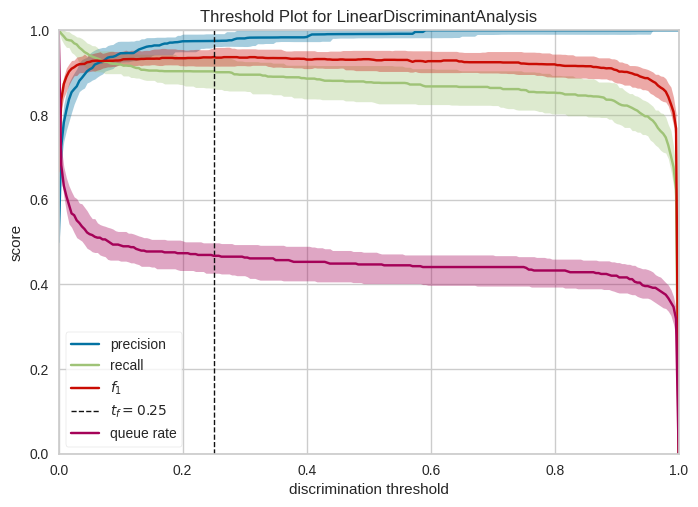

In [ ]:
#plot model - treshold
plot_model(tuned_lda_hiper, plot = 'threshold')

# Resumo Gráfico Threshold

Curvas de Métricas de Desempenho: As linhas coloridas representam diferentes métricas de desempenho para o modelo à medida que você varia o limiar de discriminação.

<br>

- Precisão (Verde): A proporção de verdadeiros positivos em relação a todos os positivos preditos pelo modelo. Valores mais altos indicam que o modelo é mais preciso, mas também pode ser mais seletivo.<br>
- Recall (Azul): A proporção de verdadeiros positivos em relação a todos os casos reais positivos. Também é conhecido como sensibilidade.<br>
- F1 Score (Vermelho): A média harmônica da precisão e do recall. É uma medida de precisão do teste que considera tanto a precisão quanto o recall para calcular a pontuação. O melhor valor é 1 e o pior é 0.<br>
- Queue Rate (Cinza): Representa a proporção de exemplos que seriam classificados como a classe positiva dada a configuração de limiar atual.<br>
<br>
Linhas Dashed Verticais: Indicam pontos de referência específicos para o limiar de discriminação. A linha tracejada preta (t_f = 0.25) indica um ponto específico onde o limiar foi definido para 0.25.

<br>

Analisando o gráfico, é possível verificar que, conforme o limiar de discriminação aumenta, a precisão tende a aumentar também, o que é esperado já que um limiar mais alto torna o modelo mais conservador ao prever a classe positiva. No entanto, o recall diminui, o que significa que o modelo começa a perder verdadeiros positivos. O F1 Score tenta equilibrar os dois, a curva mostra que existe um ponto de limiar onde se obtém um bom equilíbrio entre precisão e recall

## AUC Plot

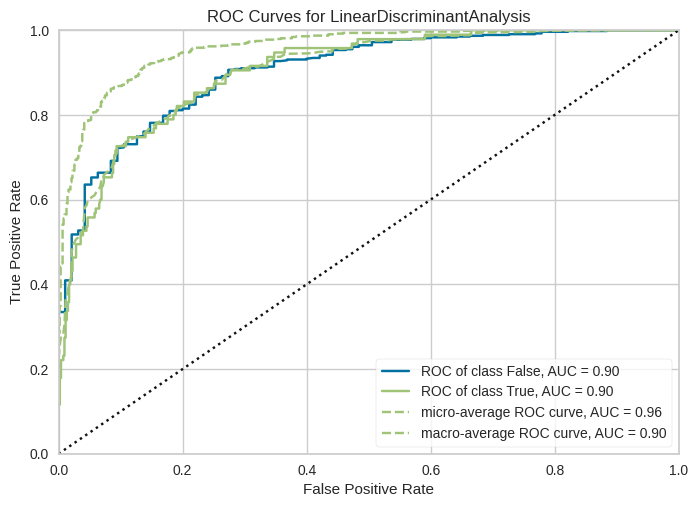

In [ ]:
#auc
plot_model(tuned_lda_hiper, plot = 'auc')

# Resumo Gráfico AUC Plot
<br>
O gráfico acima é uma Curva de Característica Operacional do Receptor (ROC) para o modelo de Análise Discriminante Linear (LDA). A Curva ROC possui uma interpretabilidade muito boa para avaliar a performance de modelos de classificação binária.

<br>


- Eixo X - Taxa de Falso Positivo (False Positive Rate, FPR): Este eixo mostra a proporção de resultados negativos reais que foram incorretamente classificados como positivos (falsos positivos) pelo modelo.<br>

- Eixo Y - Taxa de Verdadeiro Positivo (True Positive Rate, TPR): Também conhecida como sensibilidade ou recall, essa métrica mostra a proporção de resultados positivos reais que foram corretamente identificados pelo modelo.

Linhas na Curva:

- ROC de classe False (Azul escuro): Curva ROC para a previsão da classe negativa (clientes que não compraram o gadget) com uma AUC de 0.90.<br>
- ROC de classe True (Azul claro): Curva ROC para a previsão da classe positiva (clientes que compraram o gadget) também com uma AUC de 0.90.<br>
- Micro-average ROC curve (Verde tracejado): Esta curva é uma média ponderada das taxas TPR e FPR de todas as classes, dando a cada instância o mesmo peso, com uma AUC de 0.96.<br>
- Macro-average ROC curve (Verde sólido): Esta curva calcula a média das taxas TPR e FPR das diferentes classes, dando a cada classe o mesmo peso, com uma AUC de 0.90.<br>
<br>
Área sob a curva (AUC): A AUC é uma medida da capacidade do modelo de distinguir entre as classes. Varia de 0 a 1, com 1 representando um modelo perfeito e 0.5 um modelo sem capacidade discriminativa, equivalente a adivinhação aleatória. As curvas mostram AUCs de 0.90 para as previsões de ambas as classes, e uma AUC geral melhor (0.96) para a média micro, indicando um alto grau de separabilidade das classes pelo modelo.

<br>

Como o objetivo do presente trabalho é de maximizar o lucro da próxima campanha de marketing ao prever quais clientes comprarão um novo produto, um modelo com uma AUC alta é desejável. Com isso, de acordo com as ROC, o modelo é capaz de distinguir com precisão entre os clientes que são prováveis compradores e os que não são.

## Feature Importance

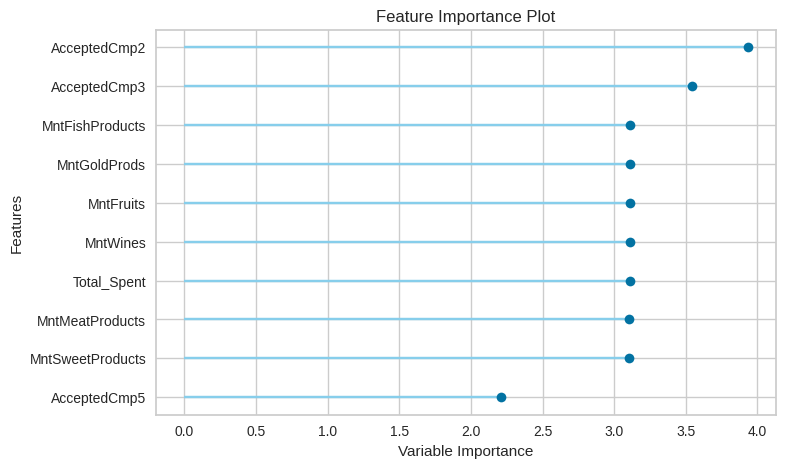

In [ ]:
#feature
plot_model(tuned_lda_hiper, plot = 'feature')

# Resumo Gráfico Feature Importance
<br>
O gráfico acima apresenta a importância das características (features) em um modelo de Análise Discriminante Linear (LDA). Essas features são variáveis utilizadas pelo modelo para fazer as previsões. A importância das features está relacionada com a medida da influência que cada as mesmas possuem para a capacidade de previsão do modelo.

<br>

- AcceptedCmp2, AcceptedCmp3: Estas são as features mais importantes para o modelo. O gráfico sugere que essas características são as que mais influenciam a previsão de se um cliente irá adquirir o produto. Por exemplo, 'AcceptedCmp2' indica que o cliente respondeu positivamente à essa campanha possui grande influencia no resultado do modelo mostrando que esse perfil possui maiores chances de aderir a campanh.<br>

- AcceptedCmp2s: Segue com valores próximos ao da AcceptedCmp2, indicando que esse perfil possui um peso significativo na previsão do modelo.<br>

- MntFishProducts, MntGoldProds, MntFruits: A partir dessas caracteristicas possuem uma importância moderada.<br>

<br>

No contexto do seu trabalho, onde o objetivo é maximizar o lucro da próxima campanha de marketing, entender a importância das features pode ajudar a equipe a identificar quais características dos clientes estão mais associadas à probabilidade de comprar o novo gadget. Em resumo o modelo indica que 'AcceptedCmp2' é a característica mais relevante, a equipe de marketing pode querer segmentar clientes que mostraram interesse em campanhas anteriores semelhantes.

## Matriz de Confusão

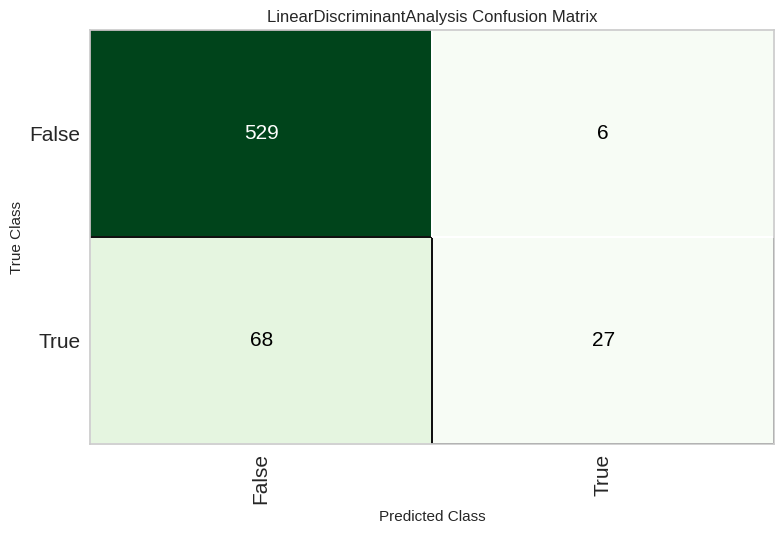

In [ ]:
# confusion_matrix
plot_model(tuned_lda_hiper, plot = 'confusion_matrix')

# Resumo Gráfico Matrix de Confusão
<br>

- Verdadeiros Negativos (True Negatives, TN): No canto superior esquerdo (529), representa os casos em que o modelo previu corretamente a classe negativa (clientes que não comprariam o gadget).<br>

- Falsos Positivos (False Positives, FP): No canto superior direito (6), representa os casos em que o modelo previu incorretamente que clientes pertenceriam à classe positiva (clientes que comprariam o gadget, mas na realidade não comprariam).<br>

- Falsos Negativos (False Negatives, FN): No canto inferior esquerdo (68), representa os casos em que o modelo previu incorretamente que clientes pertenceriam à classe negativa (clientes que comprariam o gadget, mas foram previstos como não compradores).<br>

- Verdadeiros Positivos (True Positives, TP): No canto inferior direito (27), representa os casos em que o modelo previu corretamente a classe positiva (clientes que comprariam o gadget).

<br>

Analisando a matriz de confusão temos o seguinte:

O modelo tem uma boa capacidade de identificar corretamente os clientes que não estão interessados no produto (529 verdadeiros negativos).
Há relativamente poucos casos em que o modelo gasta recursos com clientes que não vão comprar o produto (6 falsos positivos), o que é bom para a eficiência da campanha.
O modelo perdeu uma quantidade significativa de clientes potenciais (68 falsos negativos) que poderiam ter comprado o produto se tivessem sido alvo da campanha.
O modelo identificou corretamente 27 clientes que compraram.

## Class Report

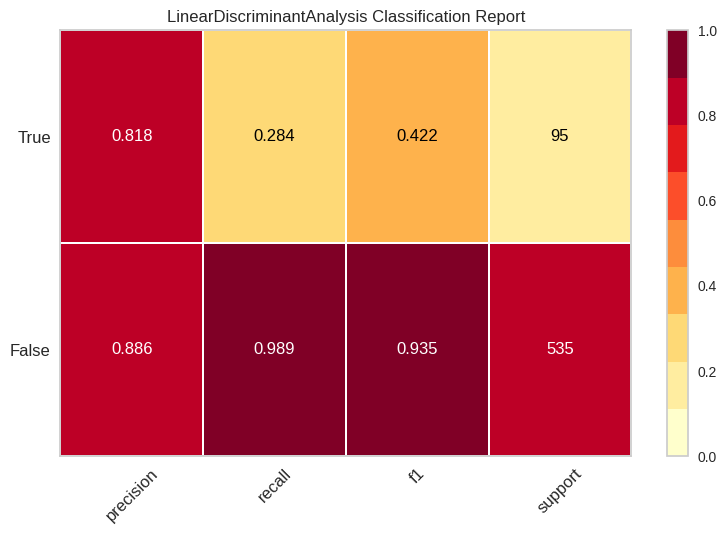

In [ ]:
#class_report
plot_model(tuned_lda_hiper, plot = 'class_report')

# Resumo Gráfico Class Report
<br>
O gráfico acima é um relatório de classificação do modelo em estudo, ele resume as métricas de desempenho do modelo para cada classe ('True' e 'False'). As cores mais escuras indicam valores mais altos e as cores mais claras valores mais baixos, seguindo a barra de cores à direita. Aqui estão os elementos detalhados:

- Precision (Precisão):
  - Para a classe 'True': 0.818, indicando que quando o modelo prevê que um cliente vai comprar o produto, está correto 81.8% das vezes.
  - Para a classe 'False': 0.886, o que significa que quando o modelo prevê que um cliente não vai comprar o produto, está correto 88.6% das vezes.<br>
<br>

- Recall (Sensibilidade):
  - Para a classe 'True': 0.284, o que sugere que o modelo é capaz de identificar corretamente 28.4% dos clientes reais que comprariam.
  - Para a classe 'False': 0.989, indicando que o modelo identifica corretamente 98.9% dos clientes que não comprariam.<br>
<br>
- F1 Score (F1):
  - Para a classe 'True': 0.422, é uma média harmônica entre precisão e recall, mostrando que o modelo tem um desempenho moderado para a classe 'True'.
  - Para a classe 'False': 0.935, indicando que o modelo tem um desempenho muito bom para a classe 'False'.<br>
<br>
- Support (Suporte):
  - Para a classe 'True': 95, que é o número de ocorrências reais da classe 'True' no conjunto de dados.
  - Para a classe 'False': 535, que é o número de ocorrências reais da classe 'False' no conjunto de dados.<br>

<br>

As métricas acima indicam que o modelo é bastante conservador, com uma alta precisão e recall para a classe 'False' (clientes que não compram), mas não tão bom em capturar a classe 'True' (clientes que compram). Isso significa que o modelo é bom em economizar recursos ao não focar em clientes que não vão comprar o gadget, mas ao custo de perder muitos clientes que comprariam.

## Precision Recall

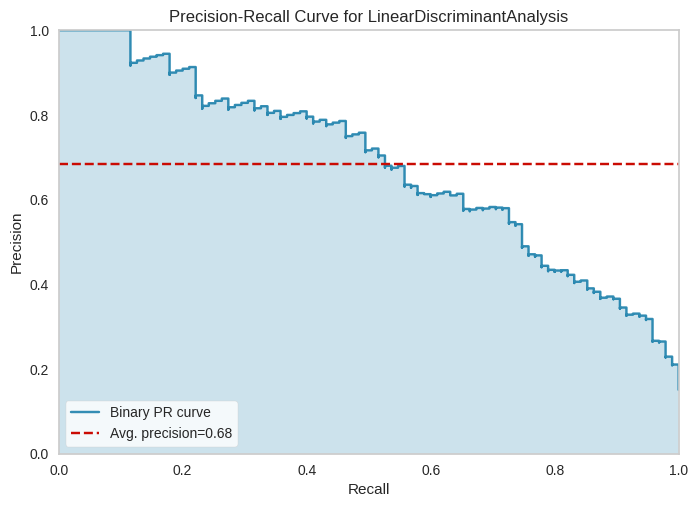

In [ ]:
# Precision Recall
plot_model(tuned_lda_hiper, plot="pr")

# Resumo Gráfico Precision Recall
<br>
A curva Precision-Recall é uma representação gráfica que ilustra a relação entre a precisão (a proporção de verdadeiros positivos em relação a todas as classificações positivas preditas) e o recall (a proporção de verdadeiros positivos em relação a todos os possíveis positivos verdadeiros, ou sensibilidade) em diferentes limiares.<br>

<br>

- Eixo X (Recall): Varia de 0 a 1, mostrando a capacidade do modelo de identificar todos os casos positivos reais. Quanto maior o recall, mais casos positivos reais são identificados.

- Eixo Y (Precision): Também varia de 0 a 1, indicando a precisão do modelo ao prever casos positivos. Quanto maior a precisão, mais confiáveis são as previsões positivas do modelo.

- Curva Precision-Recall (PR): Representada pela linha azul, mostra que, para os limiares iniciais, a precisão começa alta e o recall é baixo, indicando que o modelo está muito certo dos poucos casos positivos que ele prevê. À medida que o recall aumenta (ou seja, o modelo tenta capturar mais verdadeiros positivos), a precisão geralmente diminui, o que é típico, pois ao tentar classificar mais exemplos como positivos, alguns erros são introduzidos.

- Linha Pontilhada Vermelha (Avg. precision=0.68): Indica a precisão média do modelo. Neste caso, a precisão média é de 0.68, o que significa que, em média, o modelo tem uma precisão de 68% em seus resultados positivos preditos.

<br>

Considerando a meta do presente trabalho, onde o objetivo é otimizar a próxima campanha de marketing para maximizar o lucro, este tipo de gráfico é crucial para entender o trade-off entre capturar tantos compradores potenciais quanto possível (recall alto) e garantir que as pessoas que o modelo classifica como compradores prováveis realmente comprem o gadget (precisão alta). O desafio aqui é encontrar o equilíbrio para a campanha. Se a campanha tem um custo alto por contato e o orçamento é limitado, você pode querer priorizar a precisão para garantir que os recursos sejam gastos apenas com os clientes mais propensos a comprar. Se o custo por contato é baixo ou o orçamento é mais flexível, você pode estar mais inclinado a aceitar uma precisão um pouco menor em troca de um recall mais alto, para alcançar mais potenciais compradores.

# Referências:
* https://towardsdatascience.com/introduction-to-binary-classification-with-pycaret-a37b3e89ad8d
* https://pycaret.gitbook.io/docs/get-started/quickstart#classification
* https://pycaret.readthedocs.io/en/latest/api/classification.html#pycaret.classification.plot_model